In [5]:
import os 
print(os.listdir("../../../data"))

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from matplotlib import pylab as plt
import matplotlib.dates as mdates
plt.rcParams['figure.figsize'] = (15.0, 8.0)
import seaborn as sns

['sales_train.csv', 'test.csv']


In [6]:
train = pd.read_csv('../../../data/sales_train.csv')
print ('number of shops: ', train['shop_id'].max())
print ('number of items: ', train['item_id'].max())
num_month = train['date_block_num'].max()
print ('number of month: ', num_month)
print ('size of train: ', train.shape)
train.head()

number of shops:  59
number of items:  22169
number of month:  33
size of train:  (2935849, 6)


,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [7]:
test = pd.read_csv('../../../data/test.csv')
test.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [9]:
items = pd.read_csv('../../../data/items.csv')
print ('number of categories: ', items['item_category_id'].max()) # the maximun number of category id
items.head()

number of categories:  83


,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [10]:
train_clean = train.drop(labels = ['date', 'item_price'], axis = 1)
train_clean.head()

,date_block_num,shop_id,item_id,item_cnt_day
0,0,59,22154,1.0
1,0,25,2552,1.0
2,0,25,2552,-1.0
3,0,25,2554,1.0
4,0,25,2555,1.0


In [11]:
# change the item count per day to item count per month by using group
train_clean = train_clean.groupby(["item_id","shop_id","date_block_num"]).sum().reset_index()
train_clean = train_clean.rename(index=str, columns = {"item_cnt_day":"item_cnt_month"})
train_clean = train_clean[["item_id","shop_id","date_block_num","item_cnt_month"]]
train_clean

,item_id,shop_id,date_block_num,item_cnt_month
0,0,54,20,1.0
1,1,55,15,2.0
2,1,55,18,1.0
3,1,55,19,1.0
4,1,55,20,1.0
...,...,...,...,...
1609119,22168,12,8,1.0
1609120,22168,16,1,1.0
1609121,22168,42,1,1.0
1609122,22168,43,2,1.0


In [12]:
check = train_clean[["shop_id","item_id","date_block_num","item_cnt_month"]]
check = check.loc[check['shop_id'] == 5]
check = check.loc[check['item_id'] == 5037]
check

,shop_id,item_id,date_block_num,item_cnt_month
400439,5,5037,20,1.0
400440,5,5037,22,1.0
400441,5,5037,23,2.0
400442,5,5037,24,2.0
400443,5,5037,28,1.0
400444,5,5037,29,1.0
400445,5,5037,30,1.0
400446,5,5037,31,3.0
400447,5,5037,32,1.0


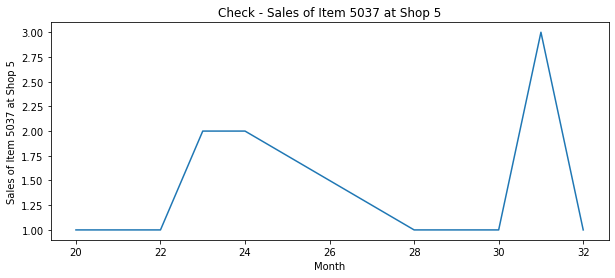

In [13]:
plt.figure(figsize=(10,4))
plt.title('Check - Sales of Item 5037 at Shop 5')
plt.xlabel('Month')
plt.ylabel('Sales of Item 5037 at Shop 5')
plt.plot(check["date_block_num"],check["item_cnt_month"]);

In [18]:
month_list=[i for i in range(num_month+1)]
shop = []
for i in range(num_month+1):
    shop.append(5)
item = []
for i in range(num_month+1):
    item.append(5037)
months_full = pd.DataFrame({'shop_id':shop, 'item_id':item,'date_block_num':month_list})
months_full.head()

,shop_id,item_id,date_block_num
0,5,5037,0
1,5,5037,1
2,5,5037,2
3,5,5037,3
4,5,5037,4


In [17]:
sales_33month = pd.merge(check, months_full, how='right', on=['shop_id','item_id','date_block_num'])
sales_33month = sales_33month.sort_values(by=['date_block_num'])
sales_33month.fillna(0.00,inplace=True)
sales_33month.head()

,shop_id,item_id,date_block_num,item_cnt_month
0,5,5037,0,0.0
1,5,5037,1,0.0
2,5,5037,2,0.0
3,5,5037,3,0.0
4,5,5037,4,0.0


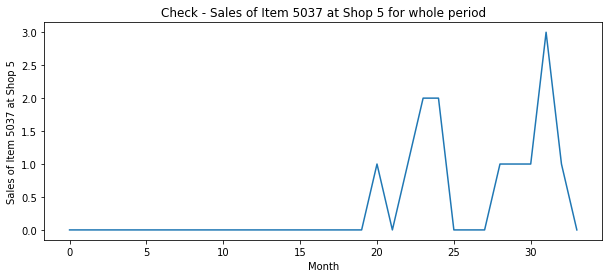

In [19]:
plt.figure(figsize=(10,4))
plt.title('Check - Sales of Item 5037 at Shop 5 for whole period')
plt.xlabel('Month')
plt.ylabel('Sales of Item 5037 at Shop 5')
plt.plot(sales_33month["date_block_num"],sales_33month["item_cnt_month"]);

In [21]:
for i in range(1,6):
    sales_33month["T_" + str(i)] = sales_33month.item_cnt_month.shift(i)
sales_33month.fillna(0.0, inplace=True)
sales_33month.head()

,shop_id,item_id,date_block_num,item_cnt_month,T_1,T_2,T_3,T_4,T_5
0,5,5037,0,0.0,0.0,0.0,0.0,0.0,0.0
1,5,5037,1,0.0,0.0,0.0,0.0,0.0,0.0
2,5,5037,2,0.0,0.0,0.0,0.0,0.0,0.0
3,5,5037,3,0.0,0.0,0.0,0.0,0.0,0.0
4,5,5037,4,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
df = sales_33month[['shop_id','item_id','date_block_num','T_1','T_2','T_3','T_4','T_5', 'item_cnt_month']].reset_index()
df = df.drop(labels = ['index'], axis = 1)
df.head()

,shop_id,item_id,date_block_num,T_1,T_2,T_3,T_4,T_5,item_cnt_month
0,5,5037,0,0.0,0.0,0.0,0.0,0.0,0.0
1,5,5037,1,0.0,0.0,0.0,0.0,0.0,0.0
2,5,5037,2,0.0,0.0,0.0,0.0,0.0,0.0
3,5,5037,3,0.0,0.0,0.0,0.0,0.0,0.0
4,5,5037,4,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
train_df = df[:-3]
val_df = df[-3:]
x_train,y_train = train_df.drop(["item_cnt_month"],axis=1),train_df.item_cnt_month
x_val,y_val = val_df.drop(["item_cnt_month"],axis=1),val_df.item_cnt_month

In [27]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
model_lstm = Sequential()
model_lstm.add(LSTM(15, input_shape=(1,8)))
model_lstm.add(Dense(1))
model_lstm.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

In [28]:
# Reshape the data between -1 and 1 and to 3D
from sklearn.preprocessing import StandardScaler,MinMaxScaler
scaler = StandardScaler()
scaler = MinMaxScaler(feature_range=(-1, 1))
x_train_scaled = scaler.fit_transform(x_train)
x_valid_scaled = scaler.fit_transform(x_val)

In [29]:
x_train_reshaped = x_train_scaled.reshape((x_train_scaled.shape[0], 1, x_train_scaled.shape[1]))
x_val_resaped = x_valid_scaled.reshape((x_valid_scaled.shape[0], 1, x_valid_scaled.shape[1]))

In [30]:
history = model_lstm.fit(x_train_reshaped, y_train, validation_data=(x_val_resaped, y_val),epochs=70, batch_size=12, verbose=2, shuffle=False)
y_pre = model_lstm.predict(x_val_resaped)

Epoch 1/70
3/3 - 2s - loss: 0.3468 - accuracy: 0.7742 - val_loss: 3.1489 - val_accuracy: 0.3333 - 2s/epoch - 637ms/step
Epoch 2/70
3/3 - 0s - loss: 0.3416 - accuracy: 0.7742 - val_loss: 3.1329 - val_accuracy: 0.3333 - 21ms/epoch - 7ms/step
Epoch 3/70
3/3 - 0s - loss: 0.3372 - accuracy: 0.7742 - val_loss: 3.1146 - val_accuracy: 0.3333 - 48ms/epoch - 16ms/step
Epoch 4/70
3/3 - 0s - loss: 0.3329 - accuracy: 0.7742 - val_loss: 3.0961 - val_accuracy: 0.3333 - 21ms/epoch - 7ms/step
Epoch 5/70
3/3 - 0s - loss: 0.3288 - accuracy: 0.7742 - val_loss: 3.0783 - val_accuracy: 0.3333 - 26ms/epoch - 9ms/step
Epoch 6/70
3/3 - 0s - loss: 0.3248 - accuracy: 0.7742 - val_loss: 3.0615 - val_accuracy: 0.3333 - 26ms/epoch - 9ms/step
Epoch 7/70
3/3 - 0s - loss: 0.3210 - accuracy: 0.7742 - val_loss: 3.0461 - val_accuracy: 0.3333 - 25ms/epoch - 8ms/step
Epoch 8/70
3/3 - 0s - loss: 0.3173 - accuracy: 0.7742 - val_loss: 3.0322 - val_accuracy: 0.3333 - 21ms/epoch - 7ms/step
Epoch 9/70
3/3 - 0s - loss: 0.3137 - ac

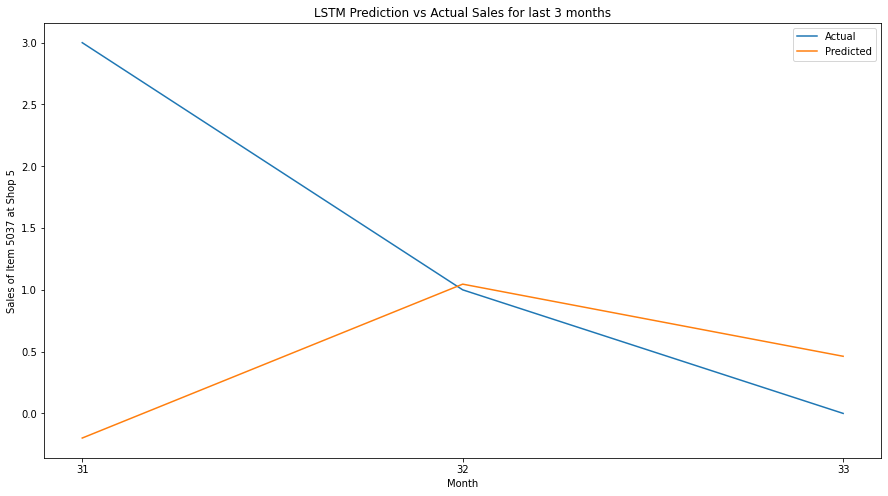

In [31]:
fig, ax = plt.subplots()
ax.plot(x_val['date_block_num'], y_val, label='Actual')
ax.plot(x_val['date_block_num'], y_pre, label='Predicted')
plt.title('LSTM Prediction vs Actual Sales for last 3 months')
plt.xlabel('Month')
plt.xticks(x_val['date_block_num'])
plt.ylabel('Sales of Item 5037 at Shop 5')
ax.legend()
plt.show()

In [32]:
from sklearn.metrics import mean_squared_error
from numpy import sqrt
rmse = sqrt(mean_squared_error(y_val,y_pre))
print('Val RMSE: %.3f' % rmse)

Val RMSE: 1.866
